In [1]:
import sys
import numpy
import numpy as np 
from PIL import Image
import ipyplot
import matplotlib.pyplot as plt
from scipy import interpolate
from scipy.interpolate import griddata
np.set_printoptions(suppress=True)
numpy.set_printoptions(threshold=sys.maxsize)

# Week 8 Linear Algebra

### Task 1 - Vector Arithmetic 

First lets remind ourselves of adding and multiplying vectors together. 

#### 1.1 
Have a try putting in different numbers and seeing what you get back. When working in **2D** can you visually link these back to combining and scaling vectors

The variable `a` contains the first vector and the variable `b` contains the second vector

The combination of the two vectors is [ 6 -1]


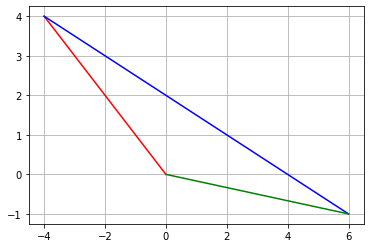

In [2]:
#Adding together two 2D vectors
a = np.array([-4,4])
b = np.array([10,-5])
c = a + b
print("The combination of the two vectors is " + str(c))
fig,ax = plt.subplots()
#vector a (red) + vector b (blue) = vector c (green)
plt.plot([0,a[0]],[0,a[1]],"r-")
plt.plot([a[0],a[0]+b[0]],[a[1],a[1]+b[1]],"b-")
plt.plot([0,c[0]],[0,c[1]],"g-")
plt.grid()

#### 1.2
Now try see how vector addition works in more than 2D dimensions

In [3]:
#It works in more dimensions!
a = np.array([1,2,3,4])
b = np.array([5,6,7,8])
a + b

array([ 6,  8, 10, 12])

#### 1.3
Try playing around with different vectors (`a`) and different scalars (`b`)

The vector scaled by the number is [3 6]


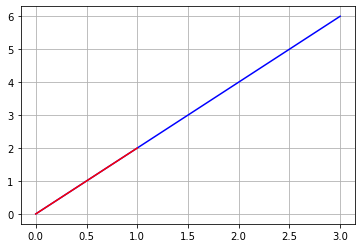

In [4]:
#Multiplying together a 2D vector and a scalar (single number)
a = np.array([1,2])
b = 3
c = a * b
print("The vector scaled by the number is " + str(c))
fig,ax = plt.subplots()
#vector a (red) scaled by b = vector c (blue)
plt.plot([0,c[0]],[0,c[1]],"b-")
plt.plot([0,a[0]],[0,a[1]],"r-")
plt.grid()

#### 1.4
Try multiplying different vectors (`a` and `b`) together. They **must be the same length**

In [5]:
#Multiplying together two vectors (it works in more dimensions!)
a = np.array([1,2,3,4])
b = np.array([5,6,7,8])
a * b

array([ 5, 12, 21, 32])

### Task 2 - Linear Transformations of Vectors 

#### 2.1
Have a play around with the code below and see how a 2D matrix that describes the transformation of the **basis vectors** 𝑖̂ and 𝑗̂ can be used to transform any vector using the **dot product**. 

You can see how the new vectors of  𝑖̂ and 𝑗̂ match the columns of the transformation matrix. 

Here, the ```@``` sign is used to give the **dot product**.

Try different tranformations (a 2x2 array in `transforms`) and different vectors (`x`)

In [6]:
i_hat = np.array([1,0])
j_hat = np.array([0,1])

#Your transform here (Try different transforms!)
transform = np.array([
 [-1,1],
 [0,-2]   
])
#New point to transform (Try different points!)
x = np.array([2,-1])

#Do the transforms (dot product)
new_i_hat = i_hat @ transform
new_j_hat = j_hat @ transform
new_x = x @ transform
print("i hat transformed is " + str(new_i_hat))
print("j hat transformed is " + str(new_j_hat))
print("x transformed is " + str(new_x))

i hat transformed is [-1  1]
j hat transformed is [ 0 -2]
x transformed is [-2  4]


#### 2.2
You can also plot the transformed vectors. Try different tranformations (a 2x2 array in `transforms`) and different vectors (`x`) above and follow the results in the plot.

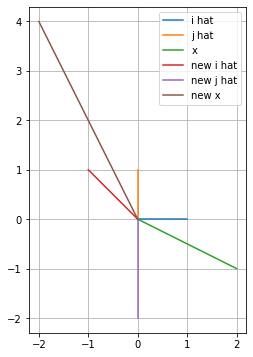

In [7]:
#Plot the transform
fig,ax = plt.subplots(figsize=(6,6))

ax.plot([0,i_hat[0]],[0,i_hat[1]],label='i hat')
ax.plot([0,j_hat[0]],[0,j_hat[1]],label='j hat')
ax.plot([0,x[0]],[0,x[1]],label='x')

ax.plot([0,new_i_hat[0]],[0,new_i_hat[1]],label='new i hat')
ax.plot([0,new_j_hat[0]],[0,new_j_hat[1]],label='new j hat')
ax.plot([0,new_x[0]],[0,new_x[1]],label='new x')

ax.set_aspect('equal')
plt.legend()
plt.grid()

### Task 3 - Transforming Matrices

Now we'll see how this works when applying to images (many coordinates!). 

1. First we get a grid that represents all the coordinates in the original images 
2. Then we apply the transformation matrix to get the new coordinates 
3. Then we interpolate to fill in the missing values 


In [8]:
def show_conversions(p,new_p,src):
    for i in range(len(p[0])):
        val = str(src[p[1][i],p[0][i]])
        old_point = str(p[0][i]) + "," + str(p[1][i])
        new_point = str(new_p[0][i]) + "," + str(new_p[1][i])
        print(val + " is moved from " + old_point + " to " + new_point)

def linear_transformation(src, transform = [[1,0],[0,1]], ax = [[0,1],[0,1]], mode = "nearest", show = False):
    h, w = src.shape
    #We want a 2 x w*h array of x,y coordinates
    x,y = np.mgrid[0:w, 0:h]
    points = np.array([x,y]).reshape((2, w*h))
    #Tranform the coordinates (matrix multiply)
    new_points = (np.array(transform) @ points)
    if show:
        show_conversions(points, new_points, src)
    #Get the target coordinates to interpolate onto
    t_y,t_x = np.mgrid[ax[0][0]*h:ax[0][1]*h, ax[1][0]*w:ax[1][1]*w]
    #Interpolate from the original data to the new coordinates
    new_image = griddata(new_points.T, src.reshape((w*h),order="F"),(t_x,t_y), method=mode)
    return new_image

def centred_axes():
    fig,ax = plt.subplots(figsize = (12,12),ncols = 2)
    for a in ax:
        a.set_xticks([])
        a.set_yticks([])
        a.spines['left'].set_position('center')
        a.spines['bottom'].set_position('center')
    return ax

#### 3.1
You can try first with a small matrix and watch where the points move. Try different **interpolation methods** ("nearest", "linear" or "cubic") and different **input matrices** (stored in the variable `a`) and watch how the coordinates are transformed and the new values are calulated by the interpolation.


Can you explain why you get some `nan` (not a number) outputs in at the edges of the transformed outputs when you use **linear** and **cubic** interpolation? Think about what information they need to estimate each new value.

In [9]:
#Input matrix
a = np.arange(16).reshape((4,4))
#Scale by 2 in the x axis, try changing to new transform if you like!
transform = np.array([
 [2,0],
 [0,1]   
])
#What interpolation method? ("nearest", "linear","cubic")
mode = "nearest"

#Multiplier on the size of the output [[ymin,ymax],[xmin,xmax]]
#Useful for transforms that scale to bigger, or translate to negative quadrants
axis=[[0,1],[0,2]]
#Try different interpolation methods (mode)
b = linear_transformation(a,transform,ax=axis,mode=mode,show=True)
print("all other points are interpolated (estimated)")
print("original")
print(a)
print("transformed")
print(b)

0 is moved from 0,0 to 0,0
4 is moved from 0,1 to 0,1
8 is moved from 0,2 to 0,2
12 is moved from 0,3 to 0,3
1 is moved from 1,0 to 2,0
5 is moved from 1,1 to 2,1
9 is moved from 1,2 to 2,2
13 is moved from 1,3 to 2,3
2 is moved from 2,0 to 4,0
6 is moved from 2,1 to 4,1
10 is moved from 2,2 to 4,2
14 is moved from 2,3 to 4,3
3 is moved from 3,0 to 6,0
7 is moved from 3,1 to 6,1
11 is moved from 3,2 to 6,2
15 is moved from 3,3 to 6,3
all other points are interpolated (estimated)
original
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
transformed
[[ 0  0  1  1  2  2  3  3]
 [ 4  4  5  5  6  6  7  7]
 [ 8  8  9  9 10 10 11 11]
 [12 12 13 13 14 14 15 15]]


#### 3.2

Try out some matrix multiplications on the site http://matrixmultiplication.xyz/. 

1. Take a 2x2 transformation matrix 
2. And a 2xn matrix representing some x and y coordinates (e.g. [[0,0,0,1,1,1],[0,1,2,0,1,2]])

Does the result give you the correct coordinates transformed?

#### 3.3

Try some bigger matrices (with more than 2 dimensions). Does this give you a feel for how the **dot products** of columns and rows are combined to make the new matrix?

### Task 4 - Images

Now we see how it works with images.

Remember, all we are doing is 

1. First we get a grid that represents all the coordinates in the original images 
2. Then we apply the transformation matrix to get the new coordinates 
3. Then we interpolate to fill in the missing values 

EASY

#### 4.1 
Look at the transformation matrices and the resulting changes to the image using the transforms provided. Can you intuitively make the connection between this and the changes to **basis vectors** 𝑖̂ and 𝑗̂?

In [13]:
#Load in images here, I'd recommend using a small one!
im = np.array(Image.open("../images/smol_cat.jpg").convert('L'))
im = np.flip(im,axis=0)

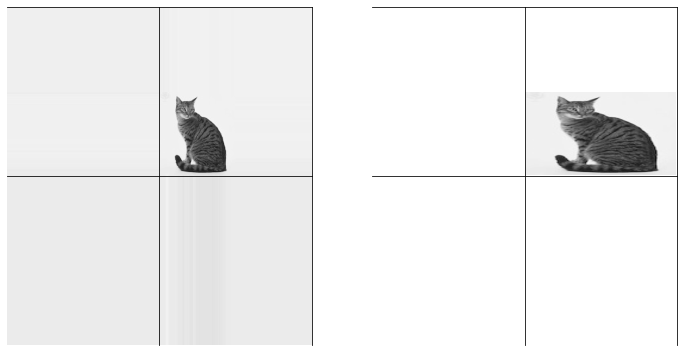

In [14]:
#Stretch in x axis
t = [[2,0],
     [0,1]]
#What interpolation method? ("nearest", "linear","cubic")
mode = "linear"

dst = linear_transformation(im, t, ax = [[-2,2],[-2,2]],mode=mode)
orig = linear_transformation(im, ax = [[-2,2],[-2,2]])
ax = centred_axes()
ax[0].imshow(orig, origin = "lower", cmap="gray")
ax[1].imshow(dst, origin = "lower", cmap="gray")

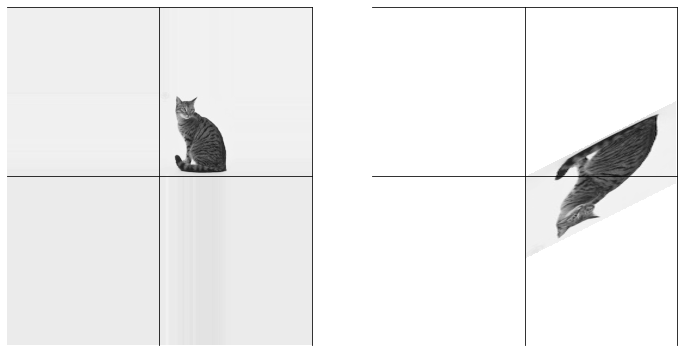

In [15]:
#Flip and shear from lecture
t = [[2,0],
     [1,-1]]
#What interpolation method? ("nearest", "linear","cubic")
mode = "linear"

dst = linear_transformation(im, t, ax = [[-2,2],[-2,2]],mode=mode)
orig = linear_transformation(im, ax = [[-2,2],[-2,2]])
ax = centred_axes()
ax[0].imshow(orig, origin = "lower", cmap="gray")
ax[1].imshow(dst, origin = "lower", cmap="gray")

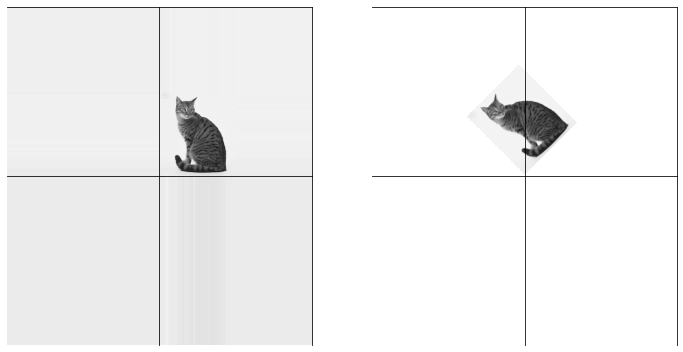

In [16]:
#Rotation (angle in radians, pi radians = 180 degrees)
angle = np.pi/4
t = [[np.cos(angle),-np.sin(angle)],
     [np.sin(angle),np.cos(angle)]]
#What interpolation method? ("nearest", "linear","cubic")
mode = "linear"

dst = linear_transformation(im, t, ax = [[-2,2],[-2,2]],mode=mode)
orig = linear_transformation(im, ax = [[-2,2],[-2,2]])
ax = centred_axes()
ax[0].imshow(orig, origin = "lower", cmap="gray")
ax[1].imshow(dst, origin = "lower", cmap="gray")

#### 4.2
Try different images (loading in the top cell (`im`)) and different transforms (a 2x2 matrix `t`), and different interpolation methods ("nearest", "linear" or "cubic")

The `ax` argument to the `linear transformation` function determines how big the output is. It represents the **min** and **max** bounds for the **height** and **width**

This shows from 0->height and 0->width of the input image

```[[0,1],[0,1]]```

This shows from -height->height and 0->width of the input image

```[[-1,1],[0,1]]```

This shows from -2\*height->2\*height and -2\*width->2\*width of the input image

```[[-2,2],[-2,2]]```

## Task 5 - Interpolation 

### 1D

Here we have a have an example of using interpolation in one dimension. 

#### 5.1 
Using the code at the bottom, experiment with changing how many points you have to interpolate (as a percentage of the original image in `sample_amount`) from, and which interpolation method (nearest, linear or cubic in `mode`)


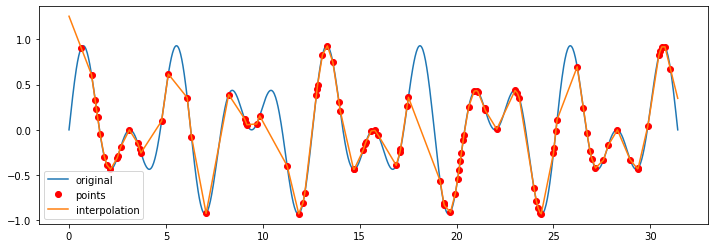

In [17]:
#####################################################
def func(x):
    x = np.array(x)
    return np.sin(2*x)*np.cos(x/2)

def plot(sample_amount,mode):
    #Get points
    num_points = 1000
    total_x = np.linspace(0,10*np.pi,num_points)
    known_x = total_x.copy()
    total_points = func(total_x)
    np.random.shuffle(known_x)
    sample_amount = int(num_points*(sample_amount)/100)
    known_x = sorted(known_x[:sample_amount])
    known_points = func(known_x)
    #Interpolate
    f = interpolate.interp1d(known_x, known_points,kind=mode,fill_value="extrapolate")
    ynew = f(total_x)
    #Plot
    fig, ax = plt.subplots(figsize = (12,4))
    ax.plot(total_x,total_points,label="original")
    ax.plot(known_x,known_points,"ro",label="points")
    ax.plot(total_x, ynew,label="interpolation")
    ax.legend()


#####################################################    

   
#Change the amount of the original sample available, and interpolation method

#How many points to interpolate from? (percentage of original function)
sample_amount = 10
#What interpolation method? ("nearest", "linear","cubic")
mode = "linear"

plot(sample_amount, mode)

## 2D

Now we're going to investigate how the same process works in 2 Dimensions with an image. 

#### 5.2

As above, you can pick how many points you have to interpolate with (`sample_amount`), and what interpolation function to use (`mode`). 

What we show you is the original image, the same points that we know the values of when interpolating and then the result of the interpolation 

In [19]:
im = np.array(Image.open("../images/smol_cat.jpg").convert('L'))
im = np.flip(im,axis=0)

(142, 128)


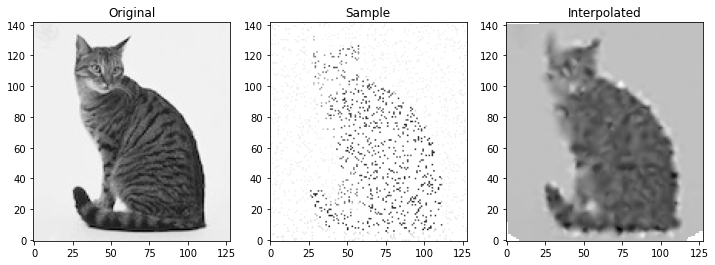

In [20]:
#####################################################

def plot(sample_amount,mode):
    h, w = im.shape
    #Get sample
    pts = np.arange(h*w)
    x,y = np.mgrid[0:w, 0:h]
    np.random.shuffle(pts)
    sample_amount = int(len(pts)*(sample_amount)/100)
    pts = sorted(pts[:sample_amount])
    coords = [i for i in zip(x.ravel()[pts],y.ravel()[pts])]
    values = [im[i[1],i[0]] for i in coords]
    sample = np.ones((h,w))*255
    for i,c in enumerate(coords):
        sample[c[1],c[0]] = values[i]
    #Interpolate
    tx,ty = np.mgrid[0:h, 0:w]
    interpolated = griddata(coords, values,(ty,tx), method=mode)
    print(interpolated.shape)
    #Plot
    fig,ax = plt.subplots(ncols = 3,figsize=(12,6))
    ax[0].imshow(im, origin = "lower", cmap="gray")
    ax[0].set_title("Original")
    ax[1].imshow(sample, origin = "lower", cmap="gray")
    ax[1].set_title("Sample")
    ax[2].imshow(interpolated, origin = "lower", cmap="gray")
    ax[2].set_title("Interpolated")

#####################################################

#Change the amount of the original sample available, and interpolation method

#How many points to interpolate from?(percentage of pixels in image)
sample_amount = 10
#What interpolation method? ("nearest", "linear","cubic")
mode = "cubic"

plot(sample_amount, mode)